# Exploratory Analysis by Genre

This notebook looks at pop, country, alternative, and rap as separate dataframes. After the individual genre analysis, I will combine all the dataframes and begin work on my final large dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Country

In [2]:
country1 = pd.read_csv('../Data/hot_country.csv')
country1.drop(columns = ['Unnamed: 0'], inplace = True)
country1.head()

,track_ids,track_pop,track_name,artist,artist_ids,featured_artist,artist_pop,genre,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
0,1JqcuWreCl5cNVsX7TKGss,58,Jersey on the Wall - I'm Just Asking,Tenille Townes,3TyeX0lk4B7k56ukfzEE0z,0,61,alberta country,0.647,0.650,...,0.0332,0.1590,0.010400,0.0818,0.567,141.938,audio_features,1JqcuWreCl5cNVsX7TKGss,245813,4
1,4hPpVbbakQNv8YTHYaOJP4,84,One Thing Right,Marshmello,64KEffDW9EtZ1y2vBYgq8T,1,90,brostep,0.659,0.623,...,0.0451,0.0667,0.000000,0.5820,0.439,88.042,audio_features,4hPpVbbakQNv8YTHYaOJP4,181824,4
2,7dnDBbHKyJNFXoeVwO8KBY,73,Blessings,Florida Georgia Line,3b8QkneNDz4JHKKKlLgYZg,0,83,contemporary country,0.466,0.672,...,0.0360,0.7370,0.000000,0.0858,0.334,89.081,audio_features,7dnDBbHKyJNFXoeVwO8KBY,198520,4
3,5M8goiFYynmNxhueYW6grR,74,Nobody But You (Duet with Gwen Stefani),Blake Shelton,1UTPBmNbXNTittyMJrNkvw,1,79,contemporary country,0.463,0.653,...,0.0273,0.1110,0.000136,0.1720,0.233,143.912,audio_features,5M8goiFYynmNxhueYW6grR,194867,4
4,5ppDdMho96v8gdDm7HKEbK,71,Nothing Like You,Luke Combs,718COspgdWOnwOFpJHRZHS,0,86,contemporary country,0.620,0.443,...,0.0280,0.3550,0.000000,0.1080,0.339,141.976,audio_features,5ppDdMho96v8gdDm7HKEbK,196320,4


In [3]:
country2 = pd.read_csv('../Data/top_country_hits.csv')
country2.drop(columns = ['Unnamed: 0'], inplace = True)
country2.head()

,track_ids,track_pop,track_name,artist,artist_ids,featured_artist,artist_pop,genre,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
0,55UCRHfezMCFfbGy0tfjTG,65,Monsters,Eric Church,2IvkS5MXK0vPGnwyJsrEyV,0,77,contemporary country,0.649,0.400,...,0.0455,0.5130,0.000001,0.0774,0.393,157.895,audio_features,55UCRHfezMCFfbGy0tfjTG,200387,4
1,5G6Nf4Ytk3dzxnhfP2AhKR,67,Ocean,Lady Antebellum,32WkQRZEVKSzVAAYqukAEA,0,76,contemporary country,0.580,0.360,...,0.0303,0.8410,0.000006,0.1290,0.302,99.194,audio_features,5G6Nf4Ytk3dzxnhfP2AhKR,210113,4
2,1mMLMZYXkMueg65jRRWG1l,76,When It Rains It Pours,Luke Combs,718COspgdWOnwOFpJHRZHS,0,86,contemporary country,0.551,0.801,...,0.0303,0.0130,0.000006,0.2650,0.625,128.027,audio_features,1mMLMZYXkMueg65jRRWG1l,240760,4
3,24TigVMgym0xm5pnyH8i2i,57,Born Here Live Here Die Here,Luke Bryan,0BvkDsjIUla7X0k6CSWh1I,0,81,contemporary country,0.510,0.740,...,0.0392,0.0684,0.000005,0.0491,0.326,132.213,audio_features,24TigVMgym0xm5pnyH8i2i,226173,4
4,7A6UIxi15awyiEbYbMF06V,65,Fight (feat. Florida Georgia Line),Tayla Parx,1LzWWI9v4UKdbBgz8fqi15,1,59,alternative r&b,0.495,0.585,...,0.0390,0.1390,0.000000,0.2570,0.570,182.883,audio_features,7A6UIxi15awyiEbYbMF06V,197128,3


In [5]:
df_country = pd.concat([country1, country2])

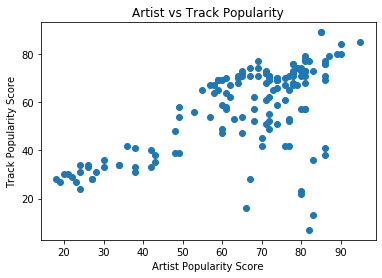

In [6]:
#track pop vs artist pop
plt.scatter(df_country['artist_pop'], df_country['track_pop']);
plt.xlabel('Artist Popularity Score');
plt.ylabel('Track Popularity Score');
plt.title('Artist vs Track Popularity');

We see a generally linear trend when we plot the artist popularity score against the track popularity. This would make sense. The more well-known and liked the artist is, the more streams/listens the song gets.

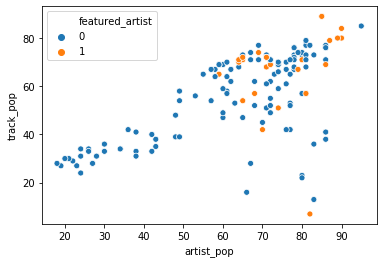

In [9]:
sns.scatterplot(x="artist_pop", y="track_pop", hue="featured_artist",
                     data=df_country);

When we get to modeling, we might want to consider an interaction term between featured artist and artist popularity

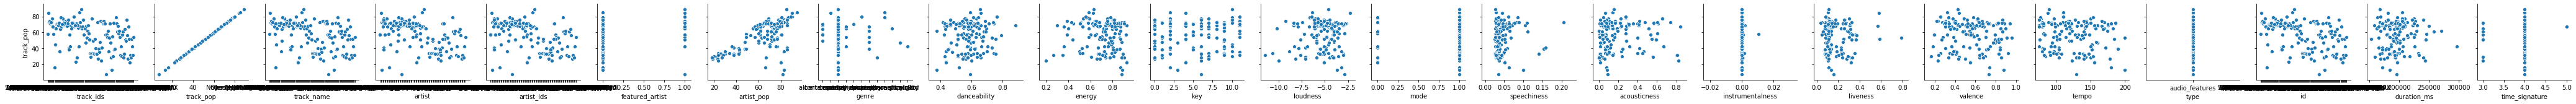

In [10]:
# This will show all of numerical variables plotted against the y popularity score--we are generally interested in
# trying to find linear/polynomial trends
sns.pairplot(df_country, x_vars= df_country.columns, y_vars=['track_pop']);

At first glance of these scatterplots against the response variable we see a couple things:
- artist pop seems to have a linear relationship
- the audio features seem to be pretty random--no blatant trend
- there seem to be a couple outliers for almost every feature

In [11]:
df_country.columns

Index(['track_ids', 'track_pop', 'track_name', 'artist', 'artist_ids',
       'featured_artist', 'artist_pop', 'genre', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id',
       'duration_ms', 'time_signature'],
      dtype='object')

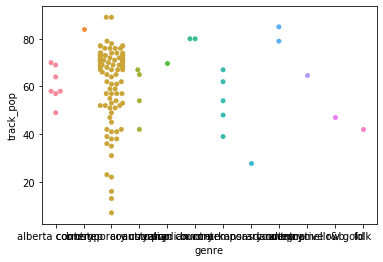

In [12]:
#Note that even within this country playlist, it seems like there are subgenres of country music. When we put 
# everything together in one DF we might wanna change all the subgenres to be 'country'
sns.swarmplot(x='genre', y="track_pop", data=df_country);

In [13]:
def subplot_distribution(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        #ax[i].set_xlabel(list_of_xlabels[i])

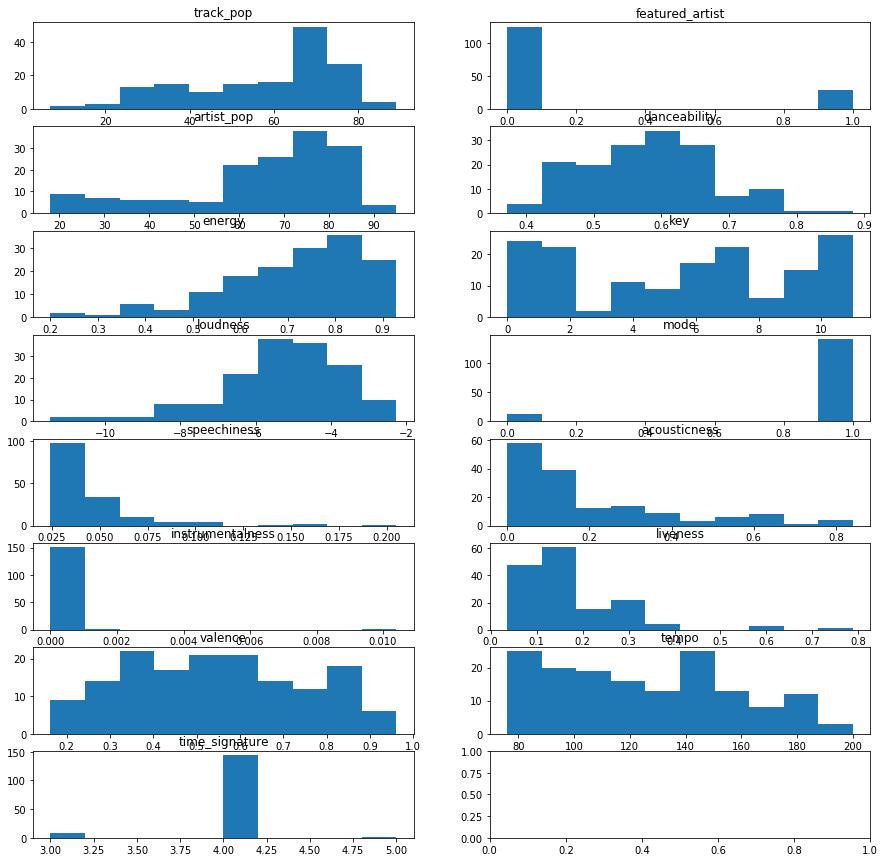

In [15]:
subplot_distribution(df_country, ['track_pop',
       'featured_artist', 'artist_pop', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'], ['track_pop',
       'featured_artist', 'artist_pop', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'], ['track_pop',
       'featured_artist', 'artist_pop', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'])